# Toronto Airbnb Price Prediction

##### Project Introduction:
Airbnb is widely used for booking short-term or even long-term rentals wherever customers need it.
In reality, most customers choose their Airbnb places mainly based on the locations and price.
I came up with this machine learning model to not only help hosts to list their rentals at a reasonable price but also provide guidelines for Airbnb to check any listings price outliers.

##### Overall Process Breakdown:
* EDA
* Data Cleaning
* Visualization
* Modeling
* Comparing Results
* Summary

In [34]:
# importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings(action="ignore")

# Loading the dataset

the `Toronto 2019 Airbnb` dataset collected from "Inside Airbnb" which is open-sourced from publicly available information from the Airbnb site.
http://insideairbnb.com/get-the-data.html

In [35]:
# loading the dataset
# check a sample
url = 'https://drive.google.com/file/d/10BHUL-rWc-smB79_xyOPzpN_ajGmpDTu/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.sample()

list_id                         listing_url  \
0     1419   https://www.airbnb.com/rooms/1419   
1     8077   https://www.airbnb.com/rooms/8077   
2    12604  https://www.airbnb.com/rooms/12604   
3    23691  https://www.airbnb.com/rooms/23691   
4    26654  https://www.airbnb.com/rooms/26654   

                                         description host_is_superhost  \
0  This large, family home is located in one of T...                 f   
1  Guest room in a luxury condo with access to al...                 f   
2  Comfortable sofa bed in airy main floor parlou...                 f   
3  Nestled in the middle of a quiet residential n...                 t   
4  CN Tower, TIFF Bell Lightbox, Metro Convention...                 f   

   host_listings_count host_has_profile_pic host_identity_verified  \
0                  1.0                    t                      t   
1                  2.0                    t                      f   
2                  1.0                    t                      t   
3                  2.0                    t                      t   
4                  7.0                    t                      t   

                           host_area  latitude  longitude  ... minimum_nights  \
0                    Little Portugal  43.64617  -79.42451  ...              4   
1  Waterfront Communities-The Island  43.64105  -79.37628  ...            180   
2                              Annex  43.66724  -79.41598  ...              1   
3               Briar Hill-Belgravia  43.69602  -79.45468  ...              1   
4  Waterfront Communities-The Island  43.64530  -79.38940  ...              4   

  has_availability number_of_reviews  requires_license  instant_bookable  \
0                t                 7                 f                 f   
1                t               169                 f                 t   
2                t                 0                 f                 f   
3                t               209                 f                 t   
4                t                37                 f                 f   

   is_business_travel_ready          cancellation_policy  \
0                         f  strict_14_with_grace_period   
1                         f  strict_14_with_grace_period   
2                         f                     moderate   
3                         f  strict_14_with_grace_period   
4                         f  strict_14_with_grace_period   

  require_guest_profile_picture  require_guest_phone_verification  price  
0                             f                                 f    470  
1                             f                                 t     98  
2                             f                                 f     65  
3                             f                                 f     72  
4                             f                                 f    199  

[5 rows x 29 columns]

In [36]:
# Print the Shape of the dataset
df.shape

(21312, 29)


##### dataset columns explanation:
Most of the columns are straightforward to understand what it represents, but a few of them need to additional explanation:

* `description`: introduction from hosts about the general information of their listings
* `property_type`: the property types, such as Apartment, Condominium, House, and so on
* `room_type`: customer rental space as the Entire home/apt, Private Room, or Shared rooms
* `bed_type`: sleeping area as the Real Bed, Futon, Pull-out Sofa, Airbed or others
* `cancellation_policy`: including moderate, flexible, strict_14_with_grace_period

In [37]:
# overall information about the Toronto 2019 Airbnb listings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21312 entries, 0 to 21311
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   list_id                           21312 non-null  int64  
 1   listing_url                       21312 non-null  object 
 2   description                       20941 non-null  object 
 3   host_is_superhost                 21300 non-null  object 
 4   host_listings_count               21300 non-null  float64
 5   host_has_profile_pic              21300 non-null  object 
 6   host_identity_verified            21300 non-null  object 
 7   host_area                         21312 non-null  object 
 8   latitude                          21312 non-null  float64
 9   longitude                         21312 non-null  float64
 10  is_location_exact                 21312 non-null  object 
 11  property_type                     21312 non-null  object 
 12  room

Based on the sample of the dataset and overall pieces of information about it.
we can tell that the dataset has minimal null values,also looks like the data types for each column are correct.

<AxesSubplot:>

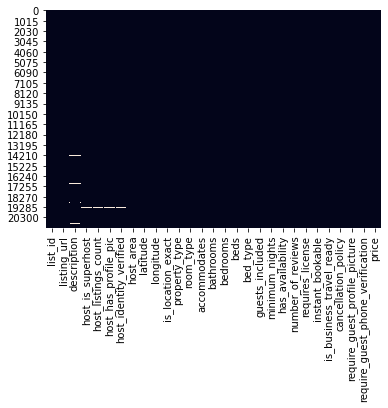

In [38]:
# visualizing null values located in the dataset
sns.heatmap(df.isnull(), cbar=False)

In [39]:
# checking null values by columns
pd.DataFrame({"Null_Percentage":(df.isna().mean()*100),"Null_Numbers":(df.isna().sum(axis=0))})

Null_Percentage  Null_Numbers
list_id                                  0.000000             0
listing_url                              0.000000             0
description                              1.740803           371
host_is_superhost                        0.056306            12
host_listings_count                      0.056306            12
host_has_profile_pic                     0.056306            12
host_identity_verified                   0.056306            12
host_area                                0.000000             0
latitude                                 0.000000             0
longitude                                0.000000             0
is_location_exact                        0.000000             0
property_type                            0.000000             0
room_type                                0.000000             0
accommodates                             0.000000             0
bathrooms                                0.056306            12
bedrooms                                 0.042230             9
beds                                     0.098536            21
bed_type                                 0.000000             0
guests_included                          0.000000             0
minimum_nights                           0.000000             0
has_availability                         0.000000             0
number_of_reviews                        0.000000             0
requires_license                         0.000000             0
instant_bookable                         0.000000             0
is_business_travel_ready                 0.000000             0
cancellation_policy                      0.000000             0
require_guest_profile_picture            0.000000             0
require_guest_phone_verification         0.000000             0
price                                    0.000000             0

as we discovered above, the dataset generally has very minimal null values across each column and the maximum of null values came from the `description` column which contains 371 rows, less than 1.8% of the entire dataset rows.
in order to speed up the process, let's drop all of those rows with null values.

In [40]:
# drop all null values
df=df.dropna(how='any')

In [41]:
# any duplicated columns?
df.transpose().duplicated()

list_id                             False
listing_url                         False
description                         False
host_is_superhost                   False
host_listings_count                 False
host_has_profile_pic                False
host_identity_verified              False
host_area                           False
latitude                            False
longitude                           False
is_location_exact                   False
property_type                       False
room_type                           False
accommodates                        False
bathrooms                           False
bedrooms                            False
beds                                False
bed_type                            False
guests_included                     False
minimum_nights                      False
has_availability                    False
number_of_reviews                   False
requires_license                    False
instant_bookable                  

column `is_business_travel_ready` duplicated with others.
let's hold the decision if we should drop the column.

In [42]:
# any duplicated rows
df.duplicated().sum()

0

# EDA

Exploratory Data Analysis - does this for Machine Learning enthusiast. It is a way of visualizing, summarizing and interpreting the information that is hidden in rows and column format. ... Once EDA is complete and insights are drawn, its feature can be used for supervised and unsupervised machine learning modelling

##### Price Feature Analysis

In [206]:
df['price'].describe()

count    20895.000000
mean       144.659057
std        241.515421
min          0.000000
25%         65.000000
50%         99.000000
75%        165.000000
max      13078.000000
Name: price, dtype: float64

In [43]:
# histogram of the price
px.histogram(df['price'], title='Overall Price Values')

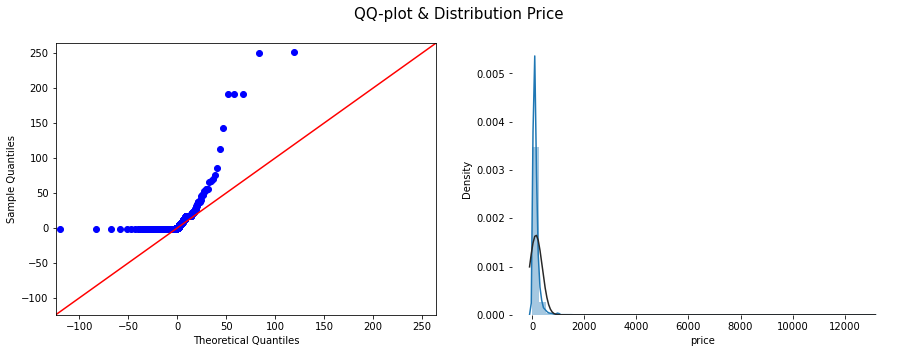

In [44]:
# check the price distribution

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("QQ-plot & Distribution Price ", fontsize= 15)

sm.qqplot(df["price"], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(df["price"], kde = True, hist=True, fit = norm, ax = ax[1])
plt.box(False)
plt.show()

the QQ plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight.

the Distribution Price plot shows that majority of the 2019 Toronto Airbnb was under 500 CAD.

In [45]:
# print skew
from scipy.stats import skew
print("Skewness of the Price is", df['price'].skew())

Skewness of the Price is 28.5218932368484


In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
For normally distributed data, the skewness should be about zero.
and this dataset has extremally high skewness which means it could be hard for models to predict.

* Get Correlation between different numerical variables

In [46]:
# check the correlation price vs others:
corr_price = df.corr()[['price']].sort_values(by='price')

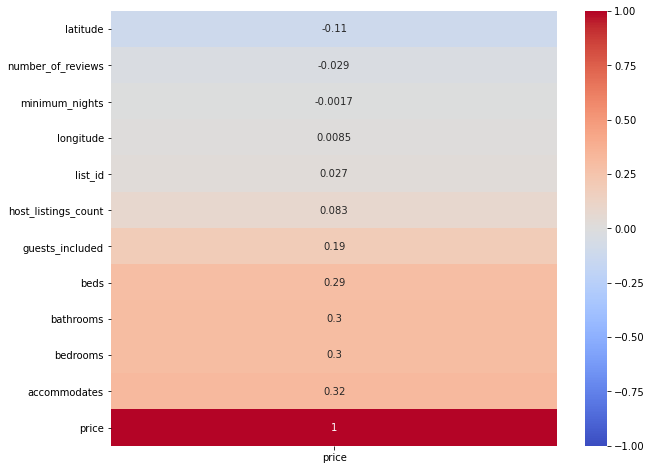

In [47]:
# corr. heatmap for the target vs numercial features
plt.figure(figsize=(10,8))
sns.heatmap(corr_price, vmin=-1, vmax=1, cmap='coolwarm',annot=True)
plt.show()

The price has the lower than moderate positive relationship (Correlation Coefficient < 0.6) with accommodates, bathrooms, bedrooms, and beds.

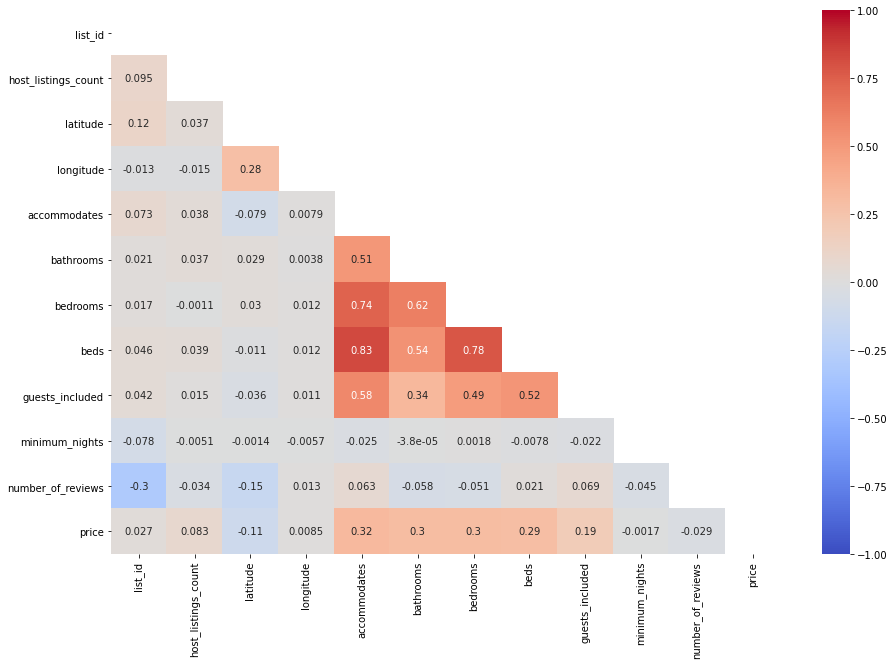

In [48]:
# Let's also look at correlations between the independent variables
plt.figure(figsize=(15,10))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), vmin=-1, vmax=1,
            cmap='coolwarm',mask=mask,annot=True)
plt.show()

interestingly those 4 independence features have a fairly (Correlation Coefficient = 0.8) strong positive relationship with each other.

In [49]:
# pull out statistics for numerical columns
df.describe()

list_id  host_listings_count      latitude     longitude  \
count  2.089500e+04         20895.000000  20895.000000  20895.000000   
mean   2.191874e+07             5.670878     43.679678    -79.397649   
std    1.002438e+07            13.161581      0.047910      0.061595   
min    1.419000e+03             0.000000     43.586710    -79.623460   
25%    1.438904e+07             1.000000     43.644970    -79.424490   
50%    2.273151e+07             2.000000     43.662080    -79.397470   
75%    3.056249e+07             4.000000     43.695880    -79.377930   
max    3.651415e+07           182.000000     43.831710    -79.124850   

       accommodates     bathrooms      bedrooms          beds  \
count  20895.000000  20895.000000  20895.000000  20895.000000   
mean       3.182149      1.257789      1.337210      1.698732   
std        2.059639      0.577640      0.883628      1.124756   
min        1.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      1.000000      1.000000   
50%        2.000000      1.000000      1.000000      1.000000   
75%        4.000000      1.000000      2.000000      2.000000   
max       16.000000     11.500000     15.000000     17.000000   

       guests_included  minimum_nights  number_of_reviews         price  
count     20895.000000    20895.000000       20895.000000  20895.000000  
mean          1.714429        6.151232          26.513041    144.659057  
std           1.392678       28.886300          47.871370    241.515421  
min           1.000000        1.000000           0.000000      0.000000  
25%           1.000000        1.000000           1.000000     65.000000  
50%           1.000000        2.000000           8.000000     99.000000  
75%           2.000000        3.000000          29.000000    165.000000  
max          16.000000     1125.000000         725.000000  13078.000000

##### Looping tho. numerical columns

for "latitude" and "longitude" columns, we don't consider them as the traditional numerical columns. we'll analysis them separately.

also briefly check all numerical columns data distributions and scatterplot with the price.

------------------------------------------
Column:  host_listings_count
null values:  0


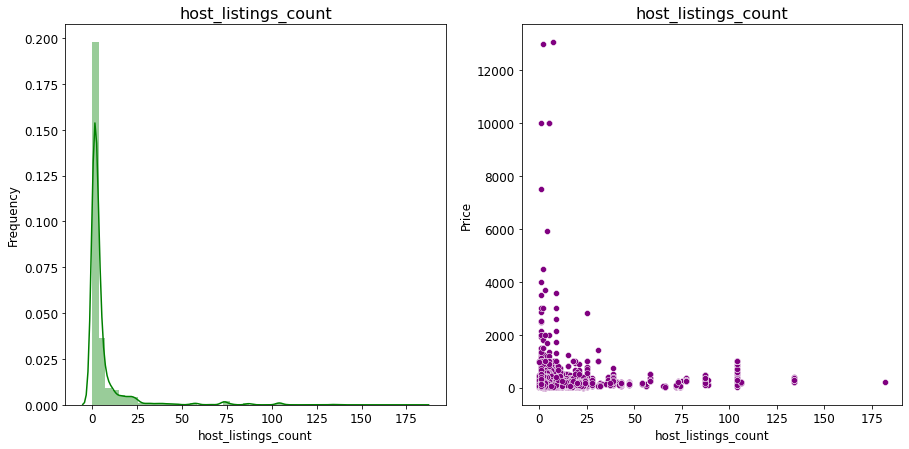

------------------------------------------
Column:  accommodates
null values:  0


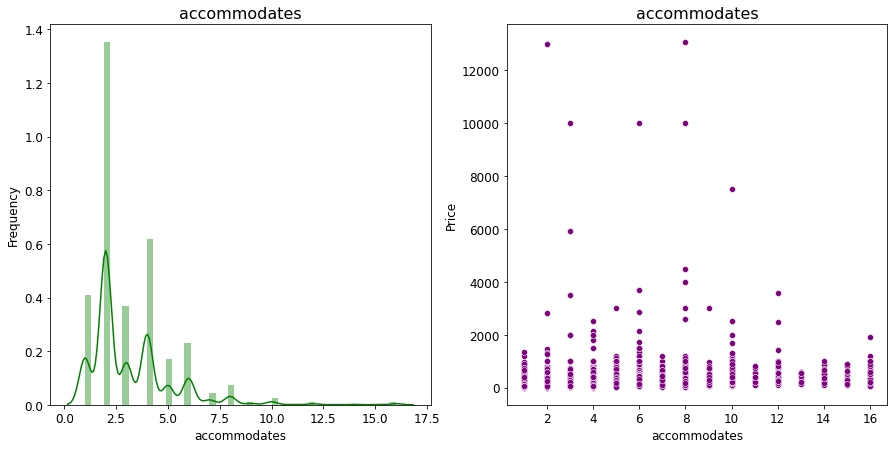

------------------------------------------
Column:  bathrooms
null values:  0


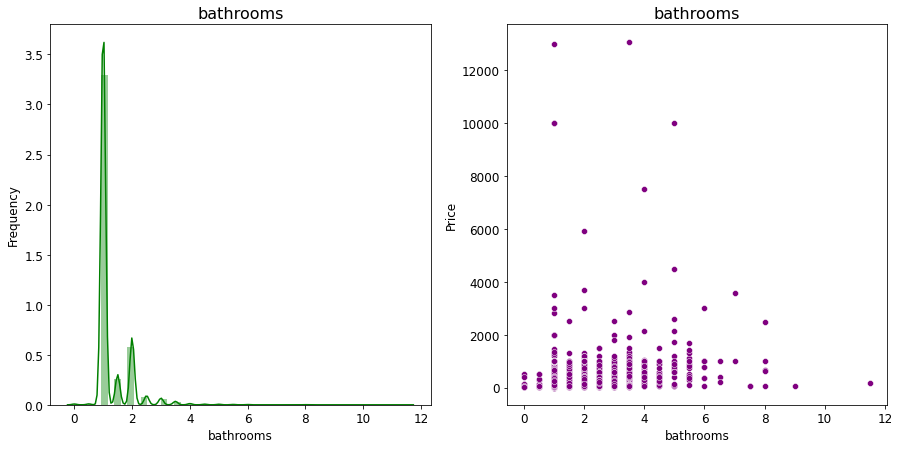

------------------------------------------
Column:  bedrooms
null values:  0


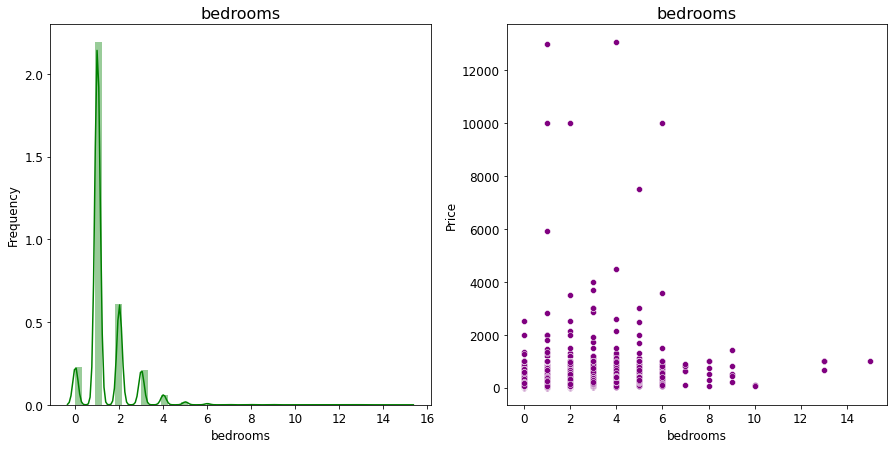

------------------------------------------
Column:  beds
null values:  0


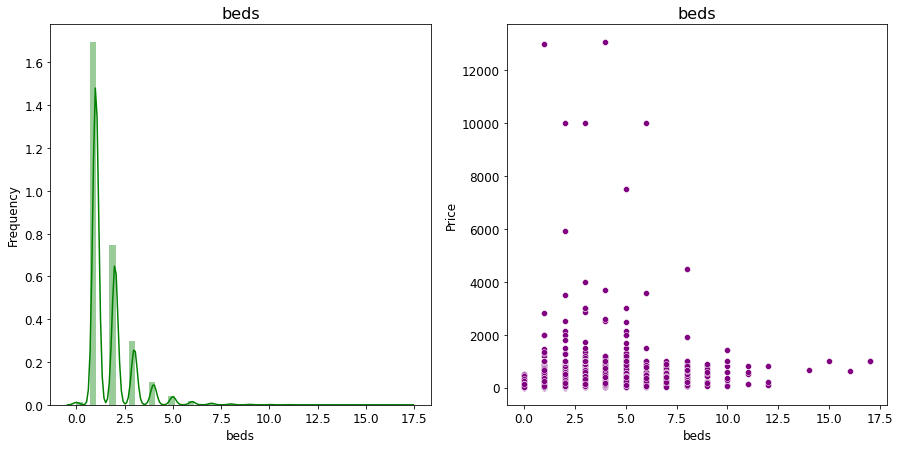

------------------------------------------
Column:  guests_included
null values:  0


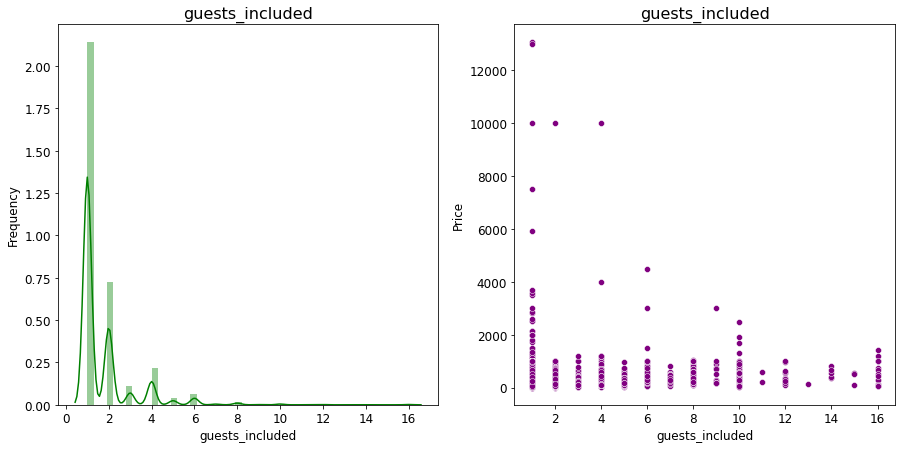

------------------------------------------
Column:  minimum_nights
null values:  0


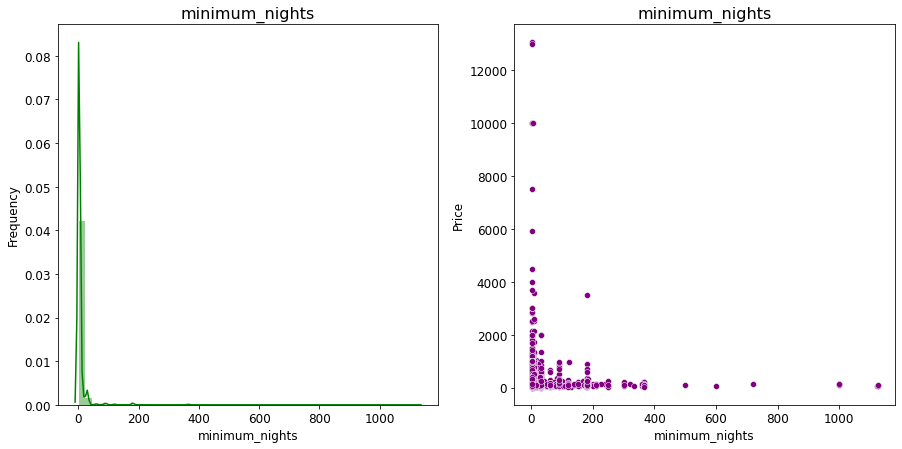

------------------------------------------
Column:  number_of_reviews
null values:  0


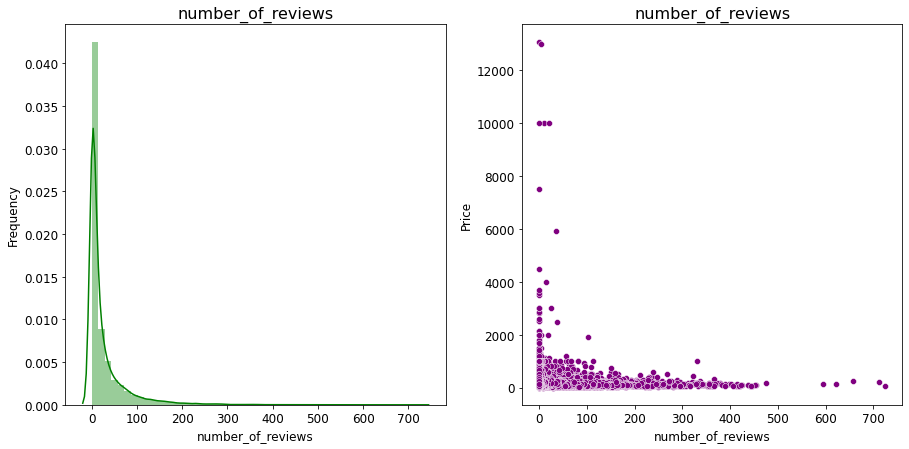

In [50]:
# looping tho. numerical columns

num_columns = ["host_listings_count","accommodates","bathrooms","bedrooms","beds",
              "guests_included","minimum_nights","number_of_reviews"]

for num in num_columns:
    print("------------------------------------------")
    print("Column: ",num)
    print("null values: ", df[num].isna().sum(axis=0))

    plt.subplots(1,2, figsize=(15,7))
    # subplot 1
    plt.subplot(1,2,1)
    sns.distplot(df[num],color='green')
    plt.title(num, fontsize=16)
    plt.xlabel(num, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # subplot 2
    plt.subplot(1,2,2)
    sns.scatterplot(x=df[num], y=df['price'],color='purple')
    plt.title(num, fontsize=16)
    plt.xlabel(num, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()

##### next, looping tho. categorical columns

------------------------------------------
Column:  host_is_superhost
null values:  0
f    15241
t     5654
Name: host_is_superhost, dtype: int64


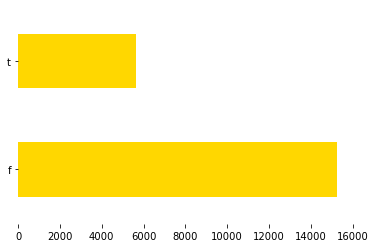



------------------------------------------
Column:  host_has_profile_pic
null values:  0
t    20849
f       46
Name: host_has_profile_pic, dtype: int64


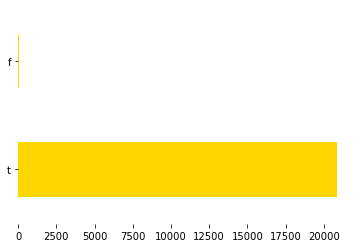



------------------------------------------
Column:  host_identity_verified
null values:  0
f    13336
t     7559
Name: host_identity_verified, dtype: int64


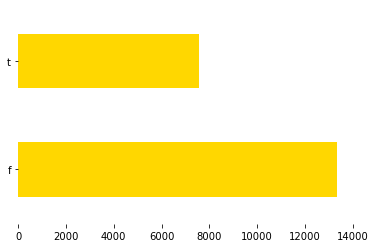



------------------------------------------
Column:  host_area
null values:  0
Waterfront Communities-The Island    3783
Niagara                               942
Annex                                 816
Church-Yonge Corridor                 718
Bay Street Corridor                   586
                                     ... 
Black Creek                            13
Beechborough-Greenbrook                11
Elms-Old Rexdale                       11
Humber Summit                          11
Markland Wood                           6
Name: host_area, Length: 140, dtype: int64


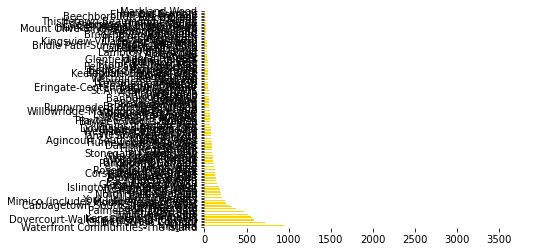



------------------------------------------
Column:  is_location_exact
null values:  0
t    16983
f     3912
Name: is_location_exact, dtype: int64


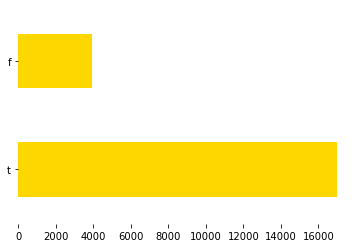



------------------------------------------
Column:  property_type
null values:  0
Apartment                 6150
Condominium               5585
House                     5560
Townhouse                  963
Guest suite                822
Bungalow                   681
Loft                       432
Serviced apartment         223
Guesthouse                 108
Villa                       95
Bed and breakfast           79
Boutique hotel              69
Other                       50
Hostel                      26
Barn                        10
Tiny house                   8
Boat                         8
Camper/RV                    5
Cottage                      4
Hotel                        3
Cave                         2
Cabin                        2
Aparthotel                   2
Heritage hotel (India)       1
Tent                         1
Casa particular (Cuba)       1
Castle                       1
Earth house                  1
Train                        1
In-law           

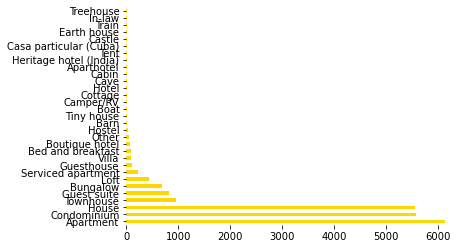



------------------------------------------
Column:  room_type
null values:  0
Entire home/apt    13617
Private room        6953
Shared room          325
Name: room_type, dtype: int64


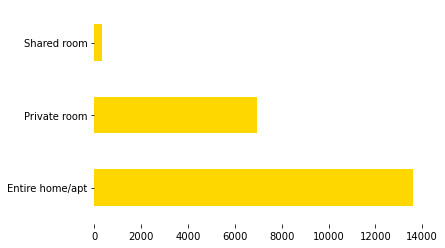



------------------------------------------
Column:  bed_type
null values:  0
Real Bed         20610
Futon              133
Pull-out Sofa       85
Airbed              36
Couch               31
Name: bed_type, dtype: int64


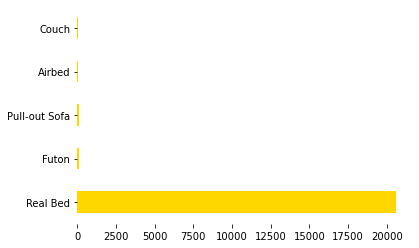



------------------------------------------
Column:  has_availability
null values:  0
t    20895
Name: has_availability, dtype: int64


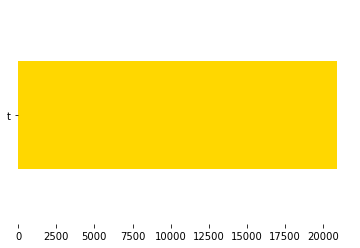



------------------------------------------
Column:  requires_license
null values:  0
f    20895
Name: requires_license, dtype: int64


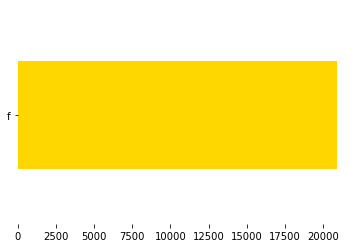



------------------------------------------
Column:  instant_bookable
null values:  0
f    12664
t     8231
Name: instant_bookable, dtype: int64


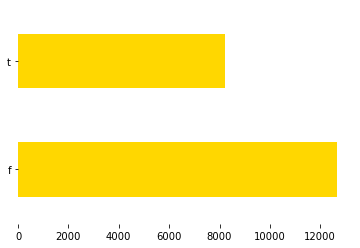



------------------------------------------
Column:  require_guest_profile_picture
null values:  0
f    20724
t      171
Name: require_guest_profile_picture, dtype: int64


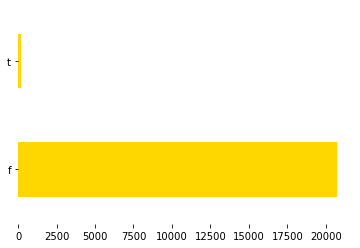



------------------------------------------
Column:  require_guest_phone_verification
null values:  0
f    20658
t      237
Name: require_guest_phone_verification, dtype: int64


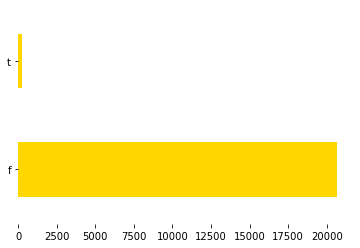



------------------------------------------
Column:  is_business_travel_ready
null values:  0
f    20895
Name: is_business_travel_ready, dtype: int64


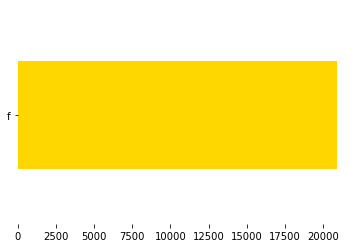



------------------------------------------
Column:  cancellation_policy
null values:  0
strict_14_with_grace_period    8522
moderate                       6450
flexible                       5882
super_strict_30                  27
super_strict_60                  14
Name: cancellation_policy, dtype: int64


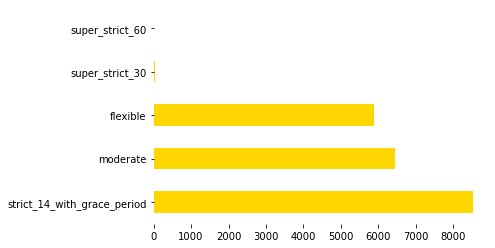

In [51]:
# looping tho. categorical columns

cat_columns = ["host_is_superhost","host_has_profile_pic","host_identity_verified","host_area","is_location_exact",
              "property_type","room_type","bed_type","has_availability","requires_license","instant_bookable",
              "require_guest_profile_picture","require_guest_phone_verification","is_business_travel_ready","cancellation_policy"]

for cat in cat_columns:
    print("------------------------------------------")
    print("Column: ",cat)
    print("null values: ", df[cat].isna().sum(axis=0))
    print(df[cat].value_counts())
    
    # plot a histogram
    df[cat].value_counts().plot(kind='barh',color='gold')
    plt.box(False) # remove the frame
    plt.show()
    
    print("\n")

we can see there's two main part of data cleaning we can do: 
* convert categorical based binary columns into numerical based binary columns
* drop categorical columns where over 99% of the values are the same

In [52]:
# convert to numerical based binary columns
df["host_is_superhost"].replace({"f":0,"t":1},inplace=True)
df["host_has_profile_pic"].replace({"f":0,"t":1},inplace=True)
df["host_identity_verified"].replace({"f":0,"t":1},inplace=True)
df["is_location_exact"].replace({"f":0,"t":1},inplace=True)
df["instant_bookable"].replace({"f":0,"t":1},inplace=True)
df["require_guest_profile_picture"].replace({"f":0,"t":1},inplace=True)
df["require_guest_phone_verification"].replace({"f":0,"t":1},inplace=True)

In [53]:
# drop columns contains one values only
df.drop(["has_availability"],axis=1,inplace=True)
df.drop(["requires_license"],axis=1,inplace=True)
df.drop(["is_business_travel_ready"],axis=1,inplace=True)

Besides those obvious adjustments, let's also take a detailed look at the `host_area` column which contains tons of locations:

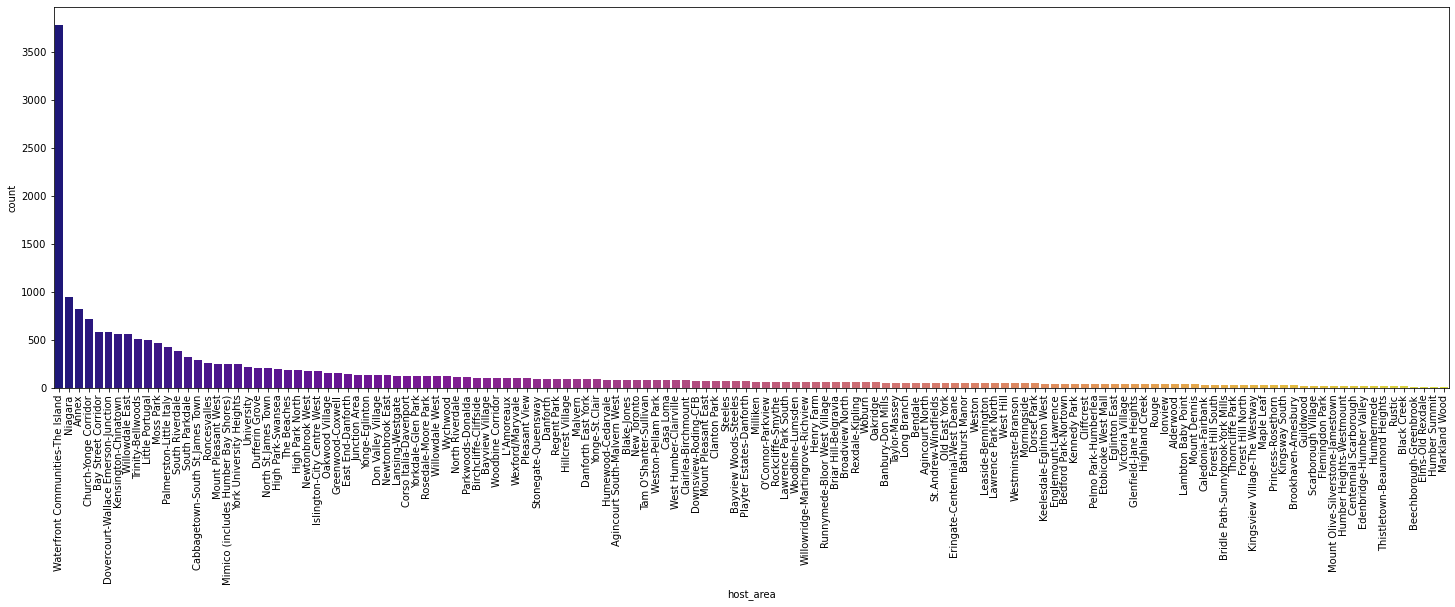

In [54]:
# ploting "host_area"
plt.figure(figsize=(25,7))
sns.countplot(x = df['host_area'],
              order = df['host_area'].value_counts().index, palette="plasma")
plt.xticks(rotation=90)
plt.show()

the tail of the plot has lots of locations containing less than 50 listings. Let's combine than together as "Others" to reduce the overfitting in the following machine learning models

In [55]:
# group host_area less than 50 as Others
names = df["host_area"].value_counts()
names_list = names.index[(names.values < 50)]
df["host_area"] = df["host_area"].apply(lambda x: "Others" if x in names_list else x)

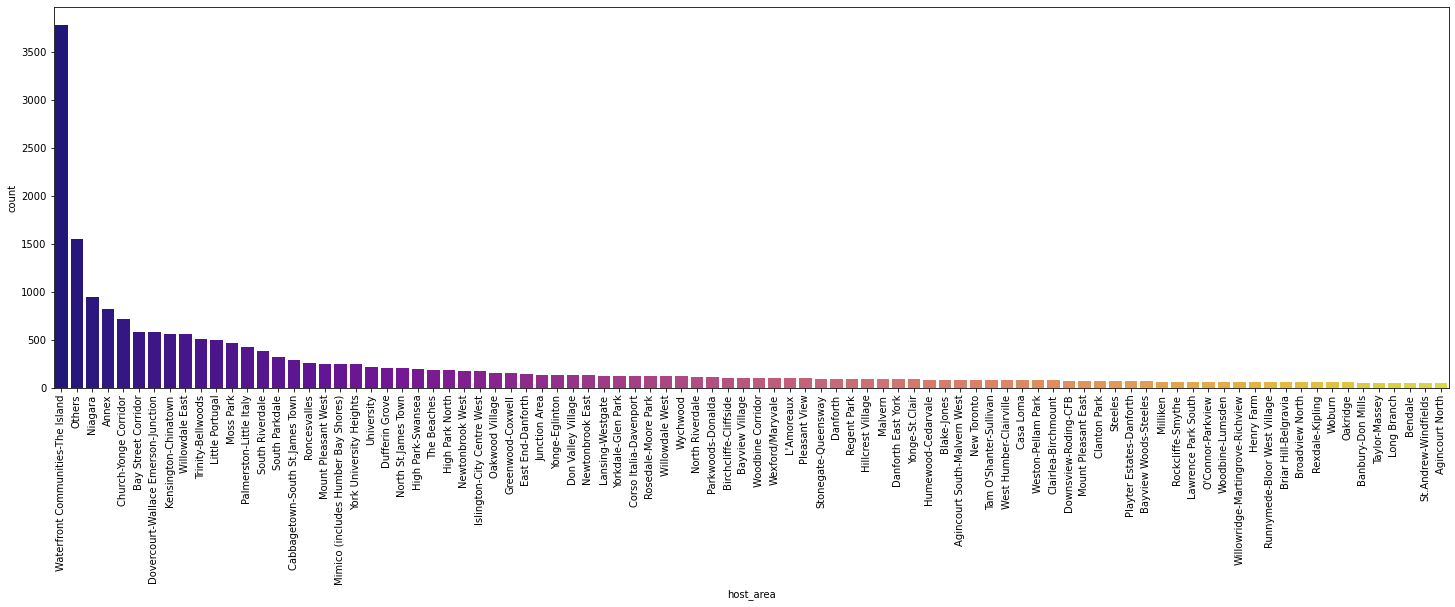

In [56]:
# check again
plt.figure(figsize=(25,7))
sns.countplot(x = df['host_area'],
              order = df['host_area'].value_counts().index, palette="plasma")
plt.xticks(rotation=90)
plt.show()

* `property_type`column has a similar situation where a few property types only list less than 10 times tho. the dataset. Let's combine them together as "Unique"

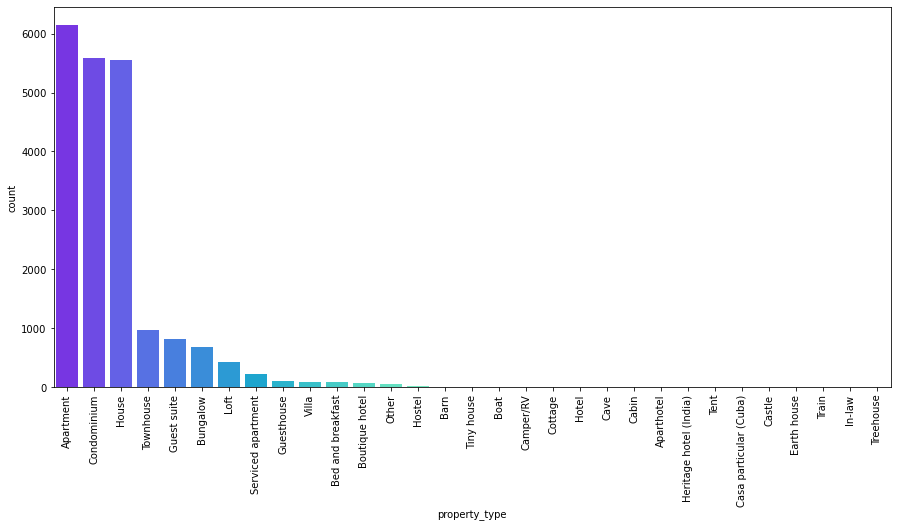

In [57]:
# ploting "property_type"
plt.figure(figsize=(15,7))
sns.countplot(x = df['property_type'],
              order = df['property_type'].value_counts().index, palette="rainbow")
plt.xticks(rotation=90)
plt.show()

In [58]:
# group property_type less than 10 as Unique
names = df["property_type"].value_counts()
names_list = names.index[(names.values < 10)]
df["property_type"] = df["property_type"].apply(lambda x: "Unique" if x in names_list else x)

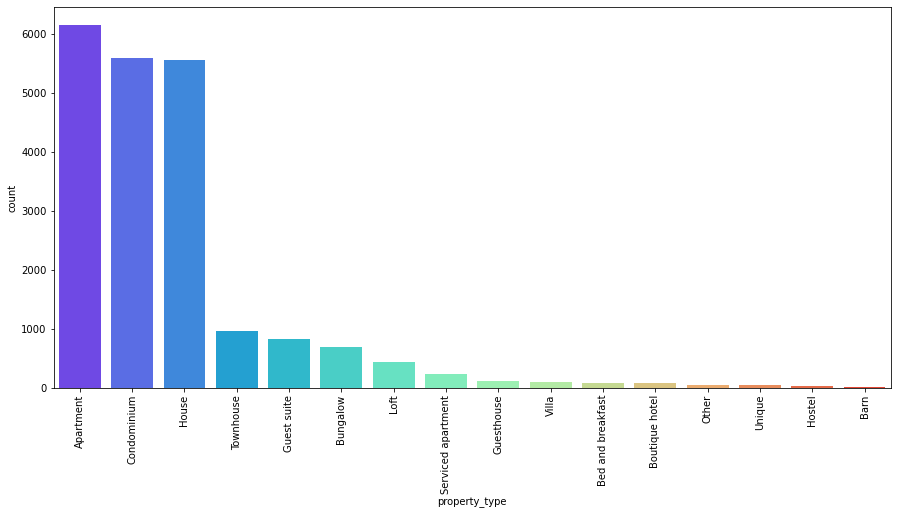

In [59]:
# check again
plt.figure(figsize=(15,7))
sns.countplot(x = df['property_type'],
              order = df['property_type'].value_counts().index, palette="rainbow")
plt.xticks(rotation=90)
plt.show()

##### Latitude & Longitude visualization

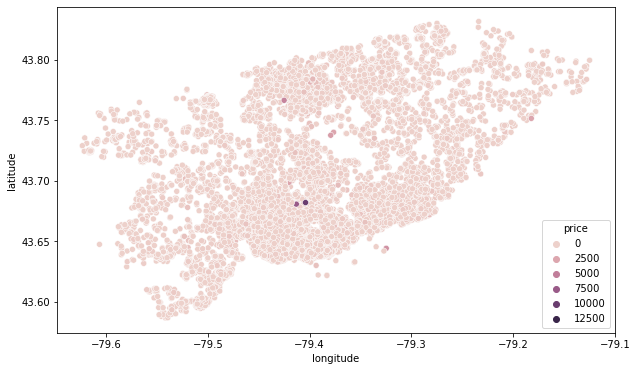

In [60]:
# distribution of listings
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.price)
plt.ioff()

A heatmap with the real Toronto open street background will help us understand better: 

In [61]:
import folium
from folium.plugins import HeatMap

# heatmap based on lat. & long.
m=folium.Map([43.6548,-79.3883],zoom_start=10,tiles = "Stamen Terrain")
HeatMap(df[['latitude','longitude']].dropna(),radius=8,
        gradient={0.2:'blue',0.4:'yellow',0.6:'gold',1.0:'red'}).add_to(m)
display(m)

from the heatmap, clearly, we can tell that downtown Toronto had the most amount of listings (red area). And the more close to the edge of Toronto the fewer listings (blue area).

Even tho. latitude & longtitude are numerical data types, we can group them and treat as addtional the additional location columns.

In [62]:
df = df.round({"latitude":2, "longitude":1})
df["latitude"] = df["latitude"].astype(object)
df["longitude"] = df["longitude"].astype(object)

In [63]:
# scatter
fig = px.scatter(df, x='host_listings_count', y='price', color='room_type',
                 title='Distribution of Room Type')
fig.show()

the distribution of room type shows that with the increase of listing price, it tends to rent out the entire home or apartment, also the hosts who have multiple listings have owned more properties.

##### description column WordCloud

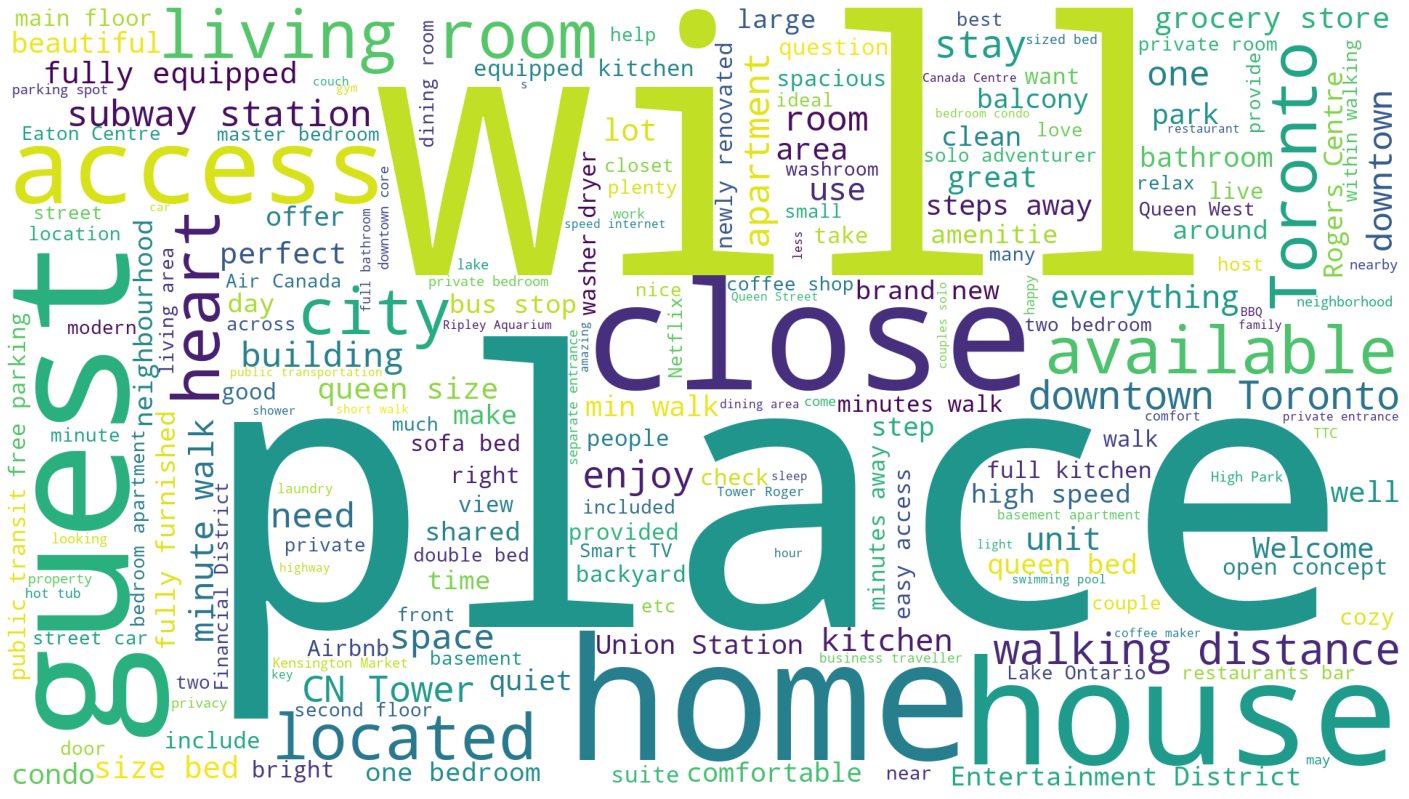

In [64]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.description))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Modeling

##### Target selection
as we explored above the target price has a wide range of values and is not normally distributed.
There are two main approaches for that:

* log-transform the target variable
* predict price range by range

in this part of the analysis, I focus on predicting the 2019 Toronto Airbnb listing price:

##### under 300 CAD

based on the mean of the price: 144 CAD and also the article published in early 2019 show that: "According to Luckey Homes, the current overall average price for renting an Airbnb apartment (entire home/apartment) in Toronto is $178 a night." 

https://dailyhive.com/toronto/toronto-subway-average-airbnb-map

In [83]:
# selecting new price range
df_selected = df[(df["price"] >= 0) & (df["price"] <= 300)]
df_selected.shape

(19577, 26)

after calculation, we only lost 8.15% of the dataset.

(21312-19577)/21312*100

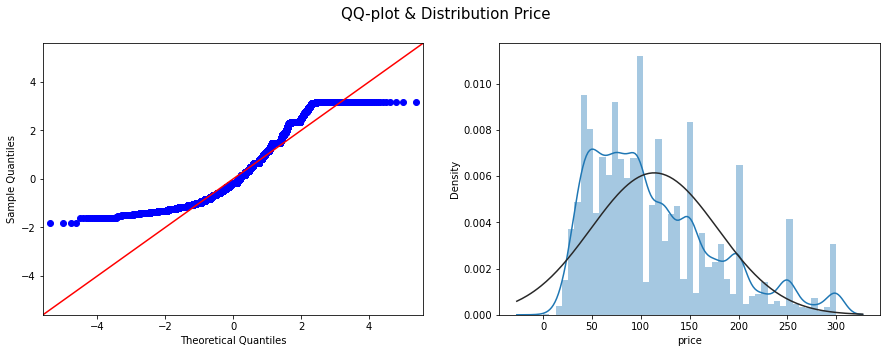

In [99]:
# check the selected target data distribution

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("QQ-plot & Distribution Price ", fontsize= 15)

sm.qqplot(df_selected['price'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(df_selected['price'], kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

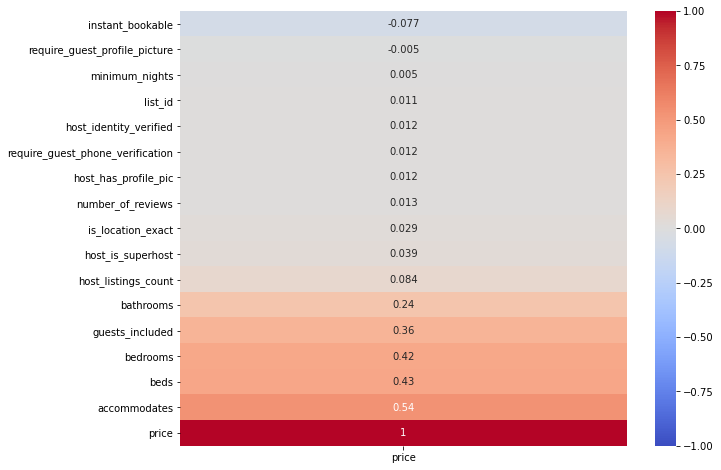

In [100]:
# creat new heatmap for select target
corr_price_selected = df_selected.corr()[['price']].sort_values(by='price')
plt.figure(figsize=(10,8))
sns.heatmap(corr_price_selected, vmin=-1, vmax=1, cmap='coolwarm',annot=True)
plt.show()

the selected listing price range as the target mainly has positive corr. with accommodates, beds, bedrooms, guests_included 

##### Feature Selections
for features, I separated them into two sets:

one set without the description feature and another set included it.

* The first feature set will use the OneHotEncoder to convert a few of the categorical columns into numerical columns.
* The second feature set will include all of the features from the first feature set plus using TfidfVectorizer to tokenize the words in the `description` column into 0/1 based matrix.

In [101]:
# set the features and target
X = df_selected.drop(columns="price")
y = df_selected['price']

In [102]:
# split the data
from sklearn.model_selection import train_test_split
# performing a train_test_split to better evaluate our model
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25, random_state=7)

##### Feature Engineering

`OneHotEncoder`: Encode categorical integer features using a one-hot aka one-of-K scheme. The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features. The output will be a sparse matrix where each column corresponds to one possible value of one feature.

In [103]:
# check the dataframe shape before OneHotEncoder
display(X_train.shape)
display(X_test.shape)

(14682, 25)

(4895, 25)

In [104]:
# defining a function for the converting
from sklearn.preprocessing import OneHotEncoder

def OHEncoder (df_train,df_test,my_names):
    # Using OneHotEncoder for train set

    # Note that the data need to be 2D-array
    FE_2d =df_train[my_names].values.reshape(-1,1)
    # Instantiate and fit the object
    ohe_FE = OneHotEncoder(handle_unknown = 'ignore').fit(FE_2d)
    # transform the column
    ohe_FE_transformed = ohe_FE.transform(FE_2d)
    # convert transformed column to dataframe
    FE_df = pd.DataFrame(ohe_FE_transformed.toarray(), 
                             columns=ohe_FE.categories_[0], dtype=int)
    # Drop one column because it is redundant data
    FE_df = FE_df.iloc[:, 1:]
    # join back to the X_train set
    df_train = pd.concat([df_train.reset_index(drop=True), FE_df], axis=1)
    # Drop the original column
    df_train.drop(columns=[my_names], inplace=True)
    
    # Using OneHotEncoder for test set

    # Note that the data need to be 2D-array
    FE_2d = df_test[my_names].values.reshape(-1,1)
    # transform the column
    ohe_FE_transformed = ohe_FE.transform(FE_2d)
    # convert transformed column to dataframe
    FE_df = pd.DataFrame(ohe_FE_transformed.toarray(), 
                             columns=ohe_FE.categories_[0], dtype=int)
    # Drop one column because it is redundant data
    FE_df = FE_df.iloc[:, 1:]
    # join back to the X_test set
    df_test = pd.concat([df_test.reset_index(drop=True), FE_df], axis=1)
    # Drop the original column
    df_test.drop(columns=[my_names], inplace=True)
    
    return df_train,df_test

In [105]:
# loop tho. columns we need to use OHE
OHcolumns = ["host_area","property_type","room_type",
             "bed_type","cancellation_policy","latitude","longitude"]
for i in OHcolumns:
    X_train,X_test = OHEncoder(X_train, X_test,i)

In [106]:
# check shapes afterwords
display(X_train.shape)
display(X_test.shape)

(14682, 161)

(4895, 161)

##### machine learning process
A linear model works really nicely when the data has a linear shape. But, when the data has a non-linear shape, then a linear model cannot capture the non-linear features.

since the selected listing price range is not normally distributed, I'll use a non-linear based model: Random Forest Regression

In [108]:
# Drop the non-related columns
X_train_OHE = X_train.drop(columns=["list_id", "listing_url","description"])
X_test_OHE = X_test.drop(columns=["list_id", "listing_url","description"])

In [110]:
# import math
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

##### Regression model evaluation metrics

* MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [111]:
# hyperparameter tuning

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

depths = np.arange(5,46,10)
r2_scores = []

for d in depths:
    RFR = RandomForestRegressor(max_depth= d,n_jobs=-1)
    scores = cross_val_score(RFR, X_train_OHE, y_train, cv=3, scoring="r2")

    r2_scores.append(round(scores.mean(), 2))

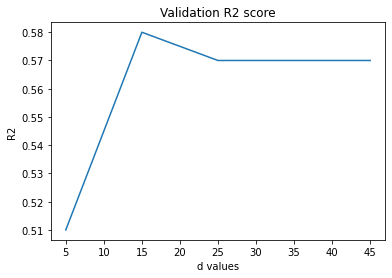

In [112]:
# plot the validation r2 score
plt.figure()
plt.plot(depths, r2_scores)
plt.title("Validation R2 score")
plt.ylabel("R2")
plt.xlabel("d values")
plt.show()

In [113]:
# Get the d values with best R2 score
best_d = depths[r2_scores.index(max(r2_scores))]

In [115]:
# refit the model
RFR_OHE = RandomForestRegressor(max_depth=best_d,n_jobs=-1).fit(X_train_OHE, y_train)
pred_test_RFR = RFR_OHE.predict(X_test_OHE)

print(f"Test MAE: {round(mean_absolute_error(y_test,pred_test_RFR),2)}")
print(f"Test R^2: {round(RFR_OHE.score(X_test_OHE, y_test),2)}")

Test MAE: 29.45
Test R^2: 0.59


After converting the categorical columns and tuning the RandomForestRegressor model, we got the `mean absolute error`: 29.45 and `R-squared` 0.59 for the test dataset.
Let's check to add the `description` column by using NLP will improve the results

# Natural Language Processing (NLP) 
for the second set of features included the `description`

In [116]:
# check the dataframe
display(X_train.shape)
display(X_test.shape)

(14682, 161)

(4895, 161)

In [117]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
# custom tokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
import string

def preprocess(text):
    
    stop_words = stopwords.words('english')
    
    # 1. SPLIT AT WHITESPACE
    text = text.split(' ')
    # 2. LOWERCASE
    text = [word.lower() for word in text]
    # 3. REMOVE PUNCTUATION
    punc_table = str.maketrans('','', string.punctuation)
    text = [word.translate(punc_table) for word in text]
    # 4. REMOVE STOPWORDS
    text = [word for word in text if word not in stop_words]
    # 5. LEMMATIZE
        # instantiate the lemmatizer
    lemmatizer = WordNetLemmatizer()
        # lemmatizing for verbs, nouns, adjectives
    text = [lemmatizer.lemmatize(word, pos='v') for word in text]
    text = [lemmatizer.lemmatize(word, pos='n') for word in text]
    text = [lemmatizer.lemmatize(word, pos='a') for word in text]
    
    return text

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizers
description_vec = TfidfVectorizer(tokenizer=preprocess, min_df=100)
# Fit the Vectorizers
description_vec = description_vec.fit(X_train['description'])
# Transform
description_train = description_vec.transform(X_train['description'])
description_test = description_vec.transform(X_test['description'])
# Check the shape
print(description_train.shape)
print(description_test.shape)

(14682, 1244)
(4895, 1244)


In [120]:
# rename train and test columns
col_names = ["d_"+column for column in description_vec.get_feature_names()]

description_train_tfidfs = pd.DataFrame(description_train.todense(), columns=col_names)
description_test_tfidfs = pd.DataFrame(description_test.todense(), columns=col_names)

(14682, 1244)
(4895, 1244)


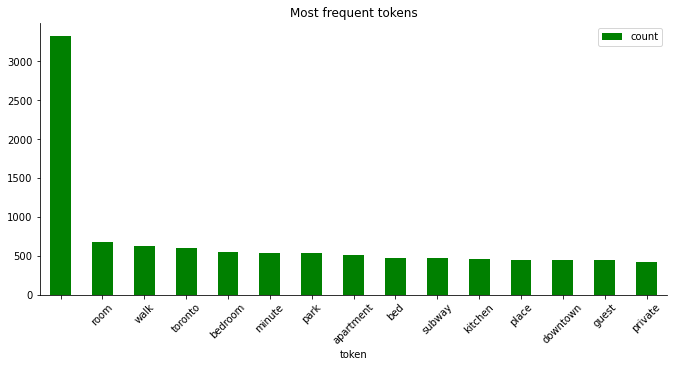

In [121]:
# plot most comment for training words

words = description_vec.get_feature_names()
word_counts = description_train.toarray().sum(axis=0)

def plot_most_frequent(words, word_counts, top=15):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax, color='green')
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
plot_most_frequent(words, word_counts)

In [122]:
# Combine the dataframe to the original train DF

# reset the index of X_train
X_train_NLP = X_train.reset_index()
description_train_tfidfs = description_train_tfidfs.reset_index()
# apple concat method
X_train_NLP = pd.concat([X_train_NLP, description_train_tfidfs],axis=1)
# check shape
print(X_train_NLP.shape)

(14682, 1407)


In [123]:
# Combine the dataframe to the original test DF

# reset the index of X_test
X_test_NLP = X_test.reset_index()
description_test_tfidfs = description_test_tfidfs.reset_index()
# apple concat method
X_test_NLP = pd.concat([X_test_NLP, description_test_tfidfs],axis=1)
# check shape
print(X_test_NLP.shape)

(4895, 1407)


In [124]:
# drop the "description" column and others
X_train_NLP = X_train_NLP.drop(["list_id", "listing_url","description"],axis=1)
X_test_NLP = X_test_NLP.drop(["list_id", "listing_url","description"],axis=1)
# check shapes
display(X_train_NLP.shape)
display(X_test_NLP.shape)

(14682, 1404)

(4895, 1404)

##### NLP Scoring

In [125]:
%%time

depths = np.arange(5,46,10)
r2_scores = []

for d in depths:
    RFR = RandomForestRegressor(max_depth= d,n_jobs=-1)
    scores = cross_val_score(RFR, X_train_NLP, y_train, cv=3, scoring="r2")

    r2_scores.append(round(scores.mean(), 2))

Wall time: 27min 9s


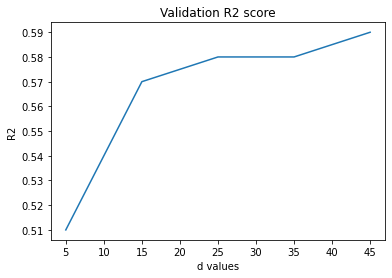

In [126]:
# plot the validation r2 score
plt.figure()
plt.plot(depths, r2_scores)
plt.title("Validation R2 score")
plt.ylabel("R2")
plt.xlabel("d values")
plt.show()

In [127]:
# Get the d values with best R2 score
best_d = depths[r2_scores.index(max(r2_scores))]

In [129]:
# refit the model
RFR_NLP = RandomForestRegressor(max_depth=25, n_jobs=-1).fit(X_train_NLP, y_train)
pred_test_NLP = RFR_NLP.predict(X_test_NLP)

print(f"Test MAE: {round(mean_absolute_error(y_test,pred_test_NLP),2)}")
print(f"Test R^2: {round(RFR_NLP.score(X_test_NLP, y_test),2)}")

Test MAE: 29.23
Test R^2: 0.59


# Comparing results

In [130]:
NLP_MAE = round(mean_absolute_error(y_test,pred_test_NLP),2)
NLP_R2 = round(RFR_NLP.score(X_test_NLP, y_test),2)
NLP_Features = X_train_NLP.shape[1]

In [131]:
OHE_MAE = round(mean_absolute_error(y_test,pred_test_RFR),2)
OHE_R2 = round(RFR_OHE.score(X_test_OHE, y_test),2)
OHE_Features = X_train_OHE.shape[1]

In [133]:
# create a table
list = {'Processing': ['OneHotEncoder','OHE + NLP'],
        'MAE': [OHE_MAE,NLP_MAE],
        'R^2': [OHE_R2,NLP_R2],
        'Features': [OHE_Features,NLP_Features]
        }

compares = pd.DataFrame(list, columns = ['Processing', 'MAE','R^2','Features'])

print (compares)

      Processing    MAE   R^2  Features
0  OneHotEncoder  29.45  0.59       158
1      OHE + NLP  29.23  0.59      1404


from the table, it's clear that added the description column using NLP didn't improve the results any better.

the next step:

# Data pipelines
focusing on the first feature set 

(which used the OneHotEncoder which is one of the feature engineering technology to convert a few of the categorical columns into numerical columns.) 

##### Hyperparameter tuning
for the models, I choose one set of 
* linear models (Linear Regression, Lasso, Ridge) and added scaling and PCA steps which both could improve the performance.

and another set of 
* nonlinear models (RandomForestRegressor, XGBRegressor)

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb

In [135]:
# estimators
# note that all the planned steps must be included
# but the second elements in each tuple are more like placeholders

estimators = [
    ('scaling', StandardScaler()),
    ('reduce_dim', PCA()),
    ('model', LinearRegression())
]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = [
    # Lasso regularization
    { 'scaling': [MinMaxScaler(), StandardScaler()],
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [0.7,0.8,0.9],
        'model': [Lasso()],
        'model__alpha': range(-5,5)
    },
    # Ridge regularization
    {'scaling': [MinMaxScaler(), StandardScaler()],
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [0.7,0.8,0.9],
        'model': [Ridge()],
        'model__alpha': 10**np.arange(-5.0, 5.0)
    },
    # RandomForestRegressor
    {
    'scaling': [None],
    'reduce_dim': [None],
    'model': [RandomForestRegressor()],
    'model__max_depth': [10,15,20],
    'model__n_estimators': [50,100,150],
    'model__min_samples_split': [2,3,4],
    'model__min_samples_leaf': [1,2,3]
    },
    # XGBRegressor
    {
    'scaling': [None],
    'reduce_dim': [None],
    'model': [xgb.XGBRegressor()],
    'model__max_depth': [10,15,20],
    'model__n_estimators': [100,200,300],
    'model__min_child_weight': [1,3,5],
    'model__alpha': [10,15,20]
    },
]
# instantiate cross-validated grid search object with the steps and parameter grid
grid = GridSearchCV(
    estimator = pipe,param_grid = param_grid,
    cv = 5,verbose = 5,n_jobs = -1
)
# fit the grid to the unprocessed training data
grid.fit(X_train_OHE, y_train);

Fitting 5 folds for each of 282 candidates, totalling 1410 fits


In [152]:
print("Best Estimator: \n{}\n".format(grid.best_estimator_))
print("Best Parameters: \n{}\n".format(grid.best_params_))
print("Best Train Score: \n{}\n".format(grid.best_score_))

Best Estimator: 
Pipeline(steps=[('scaling', None), ('reduce_dim', None),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       min_samples_split=3,
                                       n_estimators=150))])

Best Parameters: 
{'model': RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=150), 'model__max_depth': 20, 'model__min_samples_leaf': 3, 'model__min_samples_split': 3, 'model__n_estimators': 150, 'reduce_dim': None, 'scaling': None}

Best Train Score: 
0.5832281357338536



In [154]:
# Best Test Score
print(f"Best Test Score: {round(grid.score(X_test_OHE,y_test),2)}")

Best Test Score: 0.59


##### Obtain feature importance

In [140]:
# refit the model based on the Best Estimator
RFR_Pipeline = RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       min_samples_split=3,n_estimators=150,
                                     n_jobs=-1).fit(X_train_OHE, y_train)
pred_test_Pipeline = RFR_Pipeline.predict(X_test_OHE)
print(f"Final Test MAE: {round(mean_absolute_error(y_test,pred_test_Pipeline),2)}")
print(f"Final Test R^2: {round(RFR_Pipeline.score(X_test_OHE, y_test),2)}")

Final Test MAE: 29.21
Final Test R^2: 0.59


In [141]:
FI = RFR_Pipeline.feature_importances_

In [145]:
df_FI = pd.DataFrame({"Feature Importance":(FI)},index=X_train_OHE.columns).sort_values('Feature Importance', ascending=False)
df_FI.head(10)

Feature Importance
Private room                                 0.348265
bedrooms                                     0.111974
number_of_reviews                            0.065416
Waterfront Communities-The Island            0.058346
host_listings_count                          0.048873
accommodates                                 0.040035
bathrooms                                    0.039719
minimum_nights                               0.034291
-79.4                                        0.026272
guests_included                              0.022959

##### Neural Networks

In [194]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [195]:
# scaling
scaler = StandardScaler().fit(X_train_OHE)
X_train_SS = scaler.transform(X_train_OHE)
X_test_SS = scaler.transform(X_test_OHE)

In [196]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(20, activation="relu"))
# Declare the output layer
model.add(layers.Dense(1))
# Compile the model
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError()
)

In [197]:
history = model.fit(X_train_SS, y_train, epochs=50, batch_size=50,  verbose=0, validation_split=0.2)

As you can see, we have specified 50 epochs for our model. This means that we are essentially training our model over 50 forward and backward passes, with the expectation that our loss will decrease with each epoch, meaning that our model is predicting the value of y more accurately as we continue to train the model.

Let’s see what this looks like when we plot our respective losses:

dict_keys(['loss', 'val_loss'])


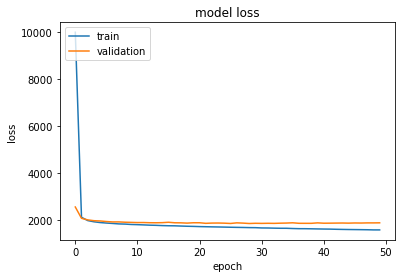

In [198]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [199]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model.evaluate(X_test_SS, y_test, verbose=0)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {result:.4f}")

y_pred = model.predict(X_test_SS)

Train Loss: 1562.5304
Test Loss: 1759.9969


In [200]:
r2_score(y_test,y_pred)

0.573277946229206

the basic setup for the Neural Networks model didn't perform as well as we expected. I didn't try enough different Hidden Layer setups due to the time consents.

# Summary: 
Total over 1400 fits and additional neural network regression model training, we reached the best test R-squared 0.59 and best test MAE 29.21 for Predicting 2019 Toronto Airbnb listing price range from 0 ~ 300 CAD.

From the feature importance from the best performance model shows that the room type, the number of bedrooms and the locations will determine the higher listing price.
Interestingly, the more reviews the higher listing price will be.

However, overall the MAE and R-squared didn’t reach the ideal range as I expected.
One of the reasons could be the 2019 Toronto Airbnb dataset didn’t include a few more features that might be essential for the price prediction, such as: if the rental has wifi, the size of the bedroom, what kind of beds and so on.

##### next steps:
* Tuning more hyperparameter and Machine Learning models, as well as Neural Networks Regression models
* predict the listing price over 300 CAD
* predict the Log Transformation listing entire price range
* Collecting more features using Airbnb API, customize the dataset